In [1]:
import os
import pandas as pd
import json
import csv
from pandas import json_normalize
import re
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

pd.set_option('display.max_columns', None)

In [2]:
###

'''Data Import'''

###

'Data Import'

In [3]:
def parse_json_to_dataset(data_dir):
    '''
    Parse multiple json files in the directory to csv files
    '''
    dataset = pd.DataFrame()
    all_json_names = os.listdir(data_dir)
    count = 0
    for name in all_json_names:
        with open(data_dir+'/'+name,'r') as read_file:
            data = json.load(read_file)
            normalized_data = json_normalize(data)
            dataset = pd.concat([dataset,normalized_data],axis=0,ignore_index=True)
    return dataset

Hospital_Data_In_US = parse_json_to_dataset('downloads/Hospital_10000')
Hospital_Data_In_US.sample(5)

,payor,estimatedPatientVolume,acute,hospitalRevenue,VerifiedTraumaProgram,url,infos.HospitalName,infos.Address,infos.City,infos.State,infos.Zipcode,infos.TypeOfFacility,infos.GeneralMed_SurgBeds,infos.SpecialCareBeds,infos.TotalEmployees,infos.TotalDischarges,infos.TotalPatientDays,infos.TotalPatientRevenue,infos.LatitudeLongitude,infos.MedicareCertifiedBeds,infos.OperatingStatus,infos.RuralDesignation,infos.Notes,infos.CMSid,clinicalServices.,clinicalServices.Other Services,clinicalServices.Emergency Services,clinicalServices.Special Care,clinicalServices.Subprovider Units,clinicalServices.Surgery,clinicalServices.Neurosciences,clinicalServices.Oncology Services,clinicalServices.Radiology / Nuclear Medicine / Imaging,clinicalServices.Rehabilitation Services,clinicalServices.Cardiovascular Services,clinicalServices.Organ Transplant (Medicare certified),clinicalServices.Orthopedic Services,clinicalServices.Wound Care
7454,",Beds,Revenue,Inpatient Days\n,,,Medicare,Medi...","Inpatient Surgeries:,""1,700""\nOutpatient Surge...",",,Discharges / ALOS / ADC\n,,Medicare,Medicaid...",",,Gross Patient Revenue\n,,Medicare,Medicaid,O...",[],https://www.ahd.com/profile.php?hcfa_id=593e53...,Raritan Bay Medical Center - Perth Amboy Division,530 New Brunswick Avenue,Perth Amboy,NJ,08861,Short Term Acute Care,265,37,"1,645","11,641","60,066","$1,347,018,374",40°31'N / 74°16'W,522,Operating,Urban,Data for this facility includes information fo...,310039,NaN,"[Hemodialysis, Lithotripsy (ESWL), Obstetrics]",[Emergency Department],"[Coronary Intensive Care (CCU), Intensive Care...",NaN,[Inpatient Surgery],"[Electroencephalography (EEG), Sleep Studies]",[Chemotherapy],"[Computed Tomography (CT), Computed Tomography...",[Physical Therapy],"[Cardiac Cath Lab, Coronary Interventions, Vas...",NaN,"[Arthroscopy, Joint Replacement]",[Wound Care]
1283,",Beds,Revenue,Inpatient Days\n,,,Medicare,Medi...",,",,Discharges / ALOS / ADC\n,,Medicare,Medicaid...",",,Gross Patient Revenue\n,,Medicare,Medicaid,O...",[],https://www.ahd.com/profile.php?hcfa_id=24e135...,Capital Caring,4715 North 15th Street,Arlington,VA,22205,Short Term Acute Care,0,0,0,0,0,"$66,833,773",38°53'N / 77°7'W,15,Operating,Urban,,490129,NaN,[Hospice],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2499,",Beds,Revenue,Inpatient Days\n,,,Medicare,Medi...",,",,Discharges / ALOS / ADC\n,,Medicare,Medicaid...",",,Gross Patient Revenue\n,,Medicare,Medicaid,O...",[],https://www.ahd.com/profile.php?hcfa_id=d8d7dd...,District Memorial Hospital,71 Whitaker Lane,Andrews,NC,28901,Short Term Acute Care,58,3,203,928,"12,547","$16,506,554",35°11'N / 83°50'W,49,Closed,Rural,Current information for this facility is avail...,340054,NaN,NaN,[Emergency Department],[Intensive Care Unit (ICU)],"[Swing Beds - NF, Swing Beds - SNF]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9048,",Beds,Revenue,Inpatient Days\n,,,Medicare,Medi...","Inpatient Surgeries:,Less than 100\nOutpatient...",",,Discharges / ALOS / ADC\n,,Medicare,Medicaid...",",,Gross Patient Revenue\n,,Medicare,Medicaid,O...",[],https://www.ahd.com/profile.php?hcfa_id=62c4e9...,Spring Mountain Treatment Center,7000 West Spring Mountain Road,Las Vegas,NV,89117,Psychiatric,110,0,178,"4,985","29,741","$59,789,560",36°7'N / 115°14'W,12,Operating,Urban,,294011,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9572,",Beds,Revenue,Inpatient Days\n,,,Medicare,Medi...",,",,Discharges / ALOS / ADC\n,,Medicare,Medicaid...",",,Gross Patient Revenue\n,,Medicare,Medicaid,O...",[Type: Level I Trauma Center],https://www.ahd.com/profile.php?hcfa_id=e675d0...,The University of Vermont Health Network Eliza...,1019 Wicker Street,Ticonderoga,NY,12883,Critical Access,0,0,89,0,0,"$21,742,938",43°50'N / 73°26'W,25,Operating - Consolidated,Rural,This facility operates in a consolidated fashi...,331306,NaN,[Helipad],[Emergency Department],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
Hospital_Data_In_US.to_csv('Data.csv')

In [5]:
###

'''Data Cleaning for variable payor'''

###

'Data Cleaning for variable payor'

In [6]:
payor = []
for value in Hospital_Data_In_US['payor']:
    payor.append(value)

In [7]:
def transfer_payor_to_list(payor):
    '''
    Simple process payor column
    '''
    if len(payor) > 0:
        payor = payor.split('\n')
        payor[0] = 'Type_Of_Services,Beds,Revenue,Inpatient_Days_of_Medicare,Inpatient_Days_of_Medicaid,Inpatient_Days_of_Other,Total_Inpatient_Days'
        del payor[1]
        return payor
    else:
        return payor

In [8]:
payor_list = []
for value in payor:
    value = transfer_payor_to_list(value)
    payor_list.append(value)

In [9]:
def split_payor_row(list_):
    text = list_
    start = []
    if '"' in list_:
        for i in re.finditer('\"',text):
            start.append(i.start())
        for j in range(0,len(start),2):
            text = text[0:start[j]] + text[start[j]:start[j+1]].replace(',','') + text[start[j+1]:]
        text = text.replace('"','')
        return text
    return str(list_.split(",")).replace('[','').replace(']','')

In [10]:
def replace_comma_in_double_quote(list_):
    '''
    use regex method to delete double quote and comma in payor column
    '''
    regex_pattern = r'(?!(([^"]*"){2})*[^"]*$),'
    replacement = ''
    return re.sub(regex_pattern,replacement,list_)
    

regex_pattern = r'(?!(([^"]*"){2})*[^"]*$),'
replacement = ''

for value in payor_list:
    for index in range(len(value)):
        value[index] = re.sub(regex_pattern, replacement, value[index])
        value[index] = value[index].replace('"','')

In [11]:
def convert_multiple_list(Values):
    '''
    expand payor column to several new columns
    and append them to the original dataset
    '''
    if len(Values) != 0:
        Column_Name = Values[0].split(',')
        Values = Values[1:]
        Values = [elem for elem in Values if elem.strip()]
        df = pd.DataFrame([sub.split(',') for sub in Values])
        df.columns = Column_Name
        df.to_csv('df.csv', index = False)
        title=[]
        col_1=[]
        clo_3=[]

        res=""
        with open('df.csv',encoding="utf-8") as csvfile:
            reader = csv.reader(csvfile)
            rows = [row for row in reader]

        for i in rows:
            if rows.index(i) ==0:
                for c in i:
                    if i.index(c) !=0:
                        title.append(c)
           
            else:
                for me in title:
                    tmp = i[0].strip("'").strip().strip("'").replace("'", "").replace('"', "") + "_" + me.strip(
                    "'").strip().strip("'").replace("'", "").replace('"', "")
                    col_1.append(tmp)
                for j in i:
                    if i.index(j) !=0:
                        clo_3.append(j.strip("'").strip().strip("'").replace("'","").replace('"',""))
        data =  {'a':col_1,
             'b':clo_3}
        data = pd.DataFrame(data).T
        data.columns = data.iloc[0]
        data.drop(data.index[0],inplace=True)
    else:
        data = pd.Series([])
    return data

In [12]:
Hospital_Data_In_US_new_payor = pd.DataFrame()
for i in range(len(payor_list)):
    Hospital_Data_In_US_new_payor = Hospital_Data_In_US_new_payor.append(convert_multiple_list(payor_list[i]),ignore_index=True)

/Users/xuguiming/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [13]:
Hospital_Data_In_US_new_payor = pd.concat([Hospital_Data_In_US,Hospital_Data_In_US_new_payor],axis=1)
Hospital_Data_In_US_new_payor.drop(Hospital_Data_In_US_new_payor.columns[0],axis=1,inplace=True)
Hospital_Data_In_US_new_payor = Hospital_Data_In_US_new_payor.loc[:,~Hospital_Data_In_US_new_payor.columns.duplicated()]
Hospital_Data_In_US_new_payor.sample(5)

,estimatedPatientVolume,acute,hospitalRevenue,VerifiedTraumaProgram,url,infos.HospitalName,infos.Address,infos.City,infos.State,infos.Zipcode,infos.TypeOfFacility,infos.GeneralMed_SurgBeds,infos.SpecialCareBeds,infos.TotalEmployees,infos.TotalDischarges,infos.TotalPatientDays,infos.TotalPatientRevenue,infos.LatitudeLongitude,infos.MedicareCertifiedBeds,infos.OperatingStatus,infos.RuralDesignation,infos.Notes,infos.CMSid,clinicalServices.,clinicalServices.Other Services,clinicalServices.Emergency Services,clinicalServices.Special Care,clinicalServices.Subprovider Units,clinicalServices.Surgery,clinicalServices.Neurosciences,clinicalServices.Oncology Services,clinicalServices.Radiology / Nuclear Medicine / Imaging,clinicalServices.Rehabilitation Services,clinicalServices.Cardiovascular Services,clinicalServices.Organ Transplant (Medicare certified),clinicalServices.Orthopedic Services,clinicalServices.Wound Care,Routine Services_Beds,Routine Services_Revenue,Routine Services_Inpatient_Days_of_Medicare,Routine Services_Inpatient_Days_of_Medicaid,Routine Services_Inpatient_Days_of_Other,Routine Services_Total_Inpatient_Days,Intensive Care Unit_Beds,Intensive Care Unit_Revenue,Intensive Care Unit_Inpatient_Days_of_Medicare,Intensive Care Unit_Inpatient_Days_of_Medicaid,Intensive Care Unit_Inpatient_Days_of_Other,Intensive Care Unit_Total_Inpatient_Days,Total Acute_Beds,Total Acute_Revenue,Total Acute_Inpatient_Days_of_Medicare,Total Acute_Inpatient_Days_of_Medicaid,Total Acute_Inpatient_Days_of_Other,Total Acute_Total_Inpatient_Days,Swing Beds - SNF_Beds,Swing Beds - SNF_Revenue,Swing Beds - SNF_Inpatient_Days_of_Medicare,Swing Beds - SNF_Inpatient_Days_of_Medicaid,Swing Beds - SNF_Inpatient_Days_of_Other,Swing Beds - SNF_Total_Inpatient_Days,Total DPU_Beds,Total DPU_Revenue,Total DPU_Inpatient_Days_of_Medicare,Total DPU_Inpatient_Days_of_Medicaid,Total DPU_Inpatient_Days_of_Other,Total DPU_Total_Inpatient_Days,Total Hospital_Beds,Total Hospital_Revenue,Total Hospital_Inpatient_Days_of_Medicare,Total Hospital_Inpatient_Days_of_Medicaid,Total Hospital_Inpatient_Days_of_Other,Total Hospital_Total_Inpatient_Days,Nursery_Beds,Nursery_Revenue,Nursery_Inpatient_Days_of_Medicare,Nursery_Inpatient_Days_of_Medicaid,Nursery_Inpatient_Days_of_Other,Nursery_Total_Inpatient_Days,Psychiatric DPU_Beds,Psychiatric DPU_Revenue,Psychiatric DPU_Inpatient_Days_of_Medicare,Psychiatric DPU_Inpatient_Days_of_Medicaid,Psychiatric DPU_Inpatient_Days_of_Other,Psychiatric DPU_Total_Inpatient_Days,Labor and Delivery *_Beds,Labor and Delivery *_Revenue,Labor and Delivery *_Inpatient_Days_of_Medicare,Labor and Delivery *_Inpatient_Days_of_Medicaid,Labor and Delivery *_Inpatient_Days_of_Other,Labor and Delivery *_Total_Inpatient_Days,Rehabilitation DPU_Beds,Rehabilitation DPU_Revenue,Rehabilitation DPU_Inpatient_Days_of_Medicare,Rehabilitation DPU_Inpatient_Days_of_Medicaid,Rehabilitation DPU_Inpatient_Days_of_Other,Rehabilitation DPU_Total_Inpatient_Days,Skilled Nursing (SNF) Unit_Beds,Skilled Nursing (SNF) Unit_Revenue,Skilled Nursing (SNF) Unit_Inpatient_Days_of_Medicare,Skilled Nursing (SNF) Unit_Inpatient_Days_of_Medicaid,Skilled Nursing (SNF) Unit_Inpatient_Days_of_Other,Skilled Nursing (SNF) Unit_Total_Inpatient_Days,Neonatal Intensive Care_Beds,Neonatal Intensive Care_Revenue,Neonatal Intensive Care_Inpatient_Days_of_Medicare,Neonatal Intensive Care_Inpatient_Days_of_Medicaid,Neonatal Intensive Care_Inpatient_Days_of_Other,Neonatal Intensive Care_Total_Inpatient_Days,Surgical Intensive Care_Beds,Surgical Intensive Care_Revenue,Surgical Intensive Care_Inpatient_Days_of_Medicare,Surgical Intensive Care_Inpatient_Days_of_Medicaid,Surgical Intensive Care_Inpatient_Days_of_Other,Surgical Intensive Care_Total_Inpatient_Days,Swing Beds - NF_Beds,Swing Beds - NF_Revenue,Swing Beds - NF_Inpatient_Days_of_Medicare,Swing Beds - NF_Inpatient_Days_of_Medicaid,Swing Beds - NF_Inpatient_Days_of_Other,Swing Beds - NF_Total_Inpatient_Days,Coronary Intensive Care_Beds,Cor

In [14]:
###
'''Data Cleaning For Variable estimatedPatientVolume & Acute & Hospital Revenue'''
###

'Data Cleaning For Variable estimatedPatientVolume & Acute & Hospital Revenue'

In [15]:
###


'''Data Cleaning For Variable acute'''

###

'Data Cleaning For Variable acute'

In [16]:
abc = []
for i in range(Hospital_Data_In_US_new_payor.shape[0]):
    if Hospital_Data_In_US_new_payor.loc[i]['acute'] is not None:
        for j in range(3):
            Hospital_Data_In_US_new_payor.loc[i]['acute'] = Hospital_Data_In_US_new_payor.loc[i]['acute'].replace('\n', '', j)
        abc.append(Hospital_Data_In_US_new_payor.loc[i]['acute'].split('\n')[:-1])
    else:
        abc.append(Hospital_Data_In_US_new_payor.loc[i]['acute'])

In [17]:
for value in abc:
    for index in range(len(value)):
        value[index] = replace_comma_in_double_quote(value[index])
        value[index] = value[index].replace('"','')

In [18]:
list_frame=[]
list_all=[]
title_list=[]
for i in abc:
    if i:
        list_all = []
        for j in i:
            if i.index(j)==0:
                new_list_0=j.split(",")
                title=[]
                title.append(new_list_0[2])
                title.append(new_list_0[4])
                title.append(new_list_0[5])
                title.append(new_list_0[6])
                #print(title)
                megerl=new_list_0[7]+","+new_list_0[8]
                for t in title:
                    t1=t+"_"+megerl
                    if t1 not in title_list:
                        title_list.append(t1)
                    tmp=new_list_0[9+title.index(t)]
                    #print(tmp)
                    list_all.append(tmp)

            else:
                new_list_0 = j.split(",")
                for t in title:
                    megerl = new_list_0[0] + "," + new_list_0[1]
                    t1 = t + "_" + megerl
                    if t1 not in title_list:
                        title_list.append(t1)
                    tmp = new_list_0[2 + title.index(t)]
                    #print(tmp)
                    list_all.append(tmp)
        if list_all:
            list_frame.append(list_all)
list_frame.insert(0,title_list)
from pandas.core.frame import DataFrame

data = DataFrame(list_frame)

In [19]:
data.columns = data.iloc[0]
data.drop(data.index[0],inplace=True)
data.sample(5)

,"Discharges / ALOS / ADC_TotalAcute,Discharges","Medicare_TotalAcute,Discharges","Medicaid_TotalAcute,Discharges","Other_TotalAcute,Discharges","Discharges / ALOS / ADC_Acute,Average Daily Census","Medicare_Acute,Average Daily Census","Medicaid_Acute,Average Daily Census","Other_Acute,Average Daily Census","Discharges / ALOS / ADC_Psychiatric DPU,Discharges","Medicare_Psychiatric DPU,Discharges","Medicaid_Psychiatric DPU,Discharges","Other_Psychiatric DPU,Discharges","Discharges / ALOS / ADC_Psychiatric DPU,Average Length of Stay","Medicare_Psychiatric DPU,Average Length of Stay","Medicaid_Psychiatric DPU,Average Length of Stay","Other_Psychiatric DPU,Average Length of Stay","Discharges / ALOS / ADC_Psychiatric DPU,Average Daily Census","Medicare_Psychiatric DPU,Average Daily Census","Medicaid_Psychiatric DPU,Average Daily Census","Other_Psychiatric DPU,Average Daily Census","Discharges / ALOS / ADC_Rehabilitation DPU,Discharges","Medicare_Rehabilitation DPU,Discharges","Medicaid_Rehabilitation DPU,Discharges","Other_Rehabilitation DPU,Discharges","Discharges / ALOS / ADC_Rehabilitation DPU,Average Length of Stay","Medicare_Rehabilitation DPU,Average Length of Stay","Medicaid_Rehabilitation DPU,Average Length of Stay","Other_Rehabilitation DPU,Average Length of Stay","Discharges / ALOS / ADC_Rehabilitation DPU,Average Daily Census","Medicare_Rehabilitation DPU,Average Daily Census","Medicaid_Rehabilitation DPU,Average Daily Census","Other_Rehabilitation DPU,Average Daily Census","Discharges / ALOS / ADC_Other DPU,Discharges","Medicare_Other DPU,Discharges","Medicaid_Other DPU,Discharges","Other_Other DPU,Discharges","Discharges / ALOS / ADC_Other DPU,Average Length of Stay","Medicare_Other DPU,Average Length of Stay","Medicaid_Other DPU,Average Length of Stay","Other_Other DPU,Average Length of Stay","Discharges / ALOS / ADC_Other DPU,Average Daily Census","Medicare_Other DPU,Average Daily Census","Medicaid_Other DPU,Average Daily Census","Other_Other DPU,Average Daily Census"
4305,54,51,214,319Acute,0.7,1.5,4.7,7.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6360,277,59,49,385Acute,2.4,0.5,0.7,3.6,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5749,103,164,308,575Acute,1.4,1.0,2.9,5.3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7878,4089,505,3045,7639Acute,56.8,8.6,44.6,110.0,48,83,607,738,3.7,3.1,0.8,1.2,0.5,0.7,1.3,2.5,158,8,17,183,10.6,12.4,30.5,12.5,4.6,0.3,1.4,6.3,None,None,None,None,None,None,None,None,None,None,None,None
3553,234,1180,1481,2895Acute,3.8,12.2,17.7,33.7,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [20]:
###


'''Estimated Patient Volume'''

###

'Estimated Patient Volume'

In [21]:
EstimatedPatientVolume = []
for i in range(Hospital_Data_In_US_new_payor.shape[0]):
    EstimatedPatientVolume.append(Hospital_Data_In_US_new_payor.loc[i]['estimatedPatientVolume'].split('\n'))

In [22]:
Estimated_Patient_Volume_DF = pd.DataFrame()
dict_ = {}
for value in EstimatedPatientVolume:
    for i in range(len(value)):
        value[i] = replace_comma_in_double_quote(value[i]).replace(',','').replace('"','').split(':')
    flat_list = [item for sublist in value for item in sublist]
    dict_ = dict(zip(flat_list[::2], flat_list[1::2]))
    Estimated_Patient_Volume_DF = Estimated_Patient_Volume_DF.append(pd.DataFrame(dict_,index=[0,]))
Estimated_Patient_Volume_DF.sample(5)

,Inpatient Surgeries,Outpatient Surgeries,Births,Outpatient Visits,Emergency Room (Not Admitted),Emergency Room (Admitted)
0,4800,3500,0,264600,12800,3200
0,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN
0,1600,4400,800,125800,25800,7800
0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
Hospital_Data_In_US_new_payor.reset_index(drop=True, inplace=True)
Estimated_Patient_Volume_DF.reset_index(drop=True, inplace=True)

Hospital_Data_In_US_new_payor_patientvolume = pd.concat([Hospital_Data_In_US_new_payor, Estimated_Patient_Volume_DF], axis=1)
Hospital_Data_In_US_new_payor_patientvolume.sample(5)

,estimatedPatientVolume,acute,hospitalRevenue,VerifiedTraumaProgram,url,infos.HospitalName,infos.Address,infos.City,infos.State,infos.Zipcode,infos.TypeOfFacility,infos.GeneralMed_SurgBeds,infos.SpecialCareBeds,infos.TotalEmployees,infos.TotalDischarges,infos.TotalPatientDays,infos.TotalPatientRevenue,infos.LatitudeLongitude,infos.MedicareCertifiedBeds,infos.OperatingStatus,infos.RuralDesignation,infos.Notes,infos.CMSid,clinicalServices.,clinicalServices.Other Services,clinicalServices.Emergency Services,clinicalServices.Special Care,clinicalServices.Subprovider Units,clinicalServices.Surgery,clinicalServices.Neurosciences,clinicalServices.Oncology Services,clinicalServices.Radiology / Nuclear Medicine / Imaging,clinicalServices.Rehabilitation Services,clinicalServices.Cardiovascular Services,clinicalServices.Organ Transplant (Medicare certified),clinicalServices.Orthopedic Services,clinicalServices.Wound Care,Routine Services_Beds,Routine Services_Revenue,Routine Services_Inpatient_Days_of_Medicare,Routine Services_Inpatient_Days_of_Medicaid,Routine Services_Inpatient_Days_of_Other,Routine Services_Total_Inpatient_Days,Intensive Care Unit_Beds,Intensive Care Unit_Revenue,Intensive Care Unit_Inpatient_Days_of_Medicare,Intensive Care Unit_Inpatient_Days_of_Medicaid,Intensive Care Unit_Inpatient_Days_of_Other,Intensive Care Unit_Total_Inpatient_Days,Total Acute_Beds,Total Acute_Revenue,Total Acute_Inpatient_Days_of_Medicare,Total Acute_Inpatient_Days_of_Medicaid,Total Acute_Inpatient_Days_of_Other,Total Acute_Total_Inpatient_Days,Swing Beds - SNF_Beds,Swing Beds - SNF_Revenue,Swing Beds - SNF_Inpatient_Days_of_Medicare,Swing Beds - SNF_Inpatient_Days_of_Medicaid,Swing Beds - SNF_Inpatient_Days_of_Other,Swing Beds - SNF_Total_Inpatient_Days,Total DPU_Beds,Total DPU_Revenue,Total DPU_Inpatient_Days_of_Medicare,Total DPU_Inpatient_Days_of_Medicaid,Total DPU_Inpatient_Days_of_Other,Total DPU_Total_Inpatient_Days,Total Hospital_Beds,Total Hospital_Revenue,Total Hospital_Inpatient_Days_of_Medicare,Total Hospital_Inpatient_Days_of_Medicaid,Total Hospital_Inpatient_Days_of_Other,Total Hospital_Total_Inpatient_Days,Nursery_Beds,Nursery_Revenue,Nursery_Inpatient_Days_of_Medicare,Nursery_Inpatient_Days_of_Medicaid,Nursery_Inpatient_Days_of_Other,Nursery_Total_Inpatient_Days,Psychiatric DPU_Beds,Psychiatric DPU_Revenue,Psychiatric DPU_Inpatient_Days_of_Medicare,Psychiatric DPU_Inpatient_Days_of_Medicaid,Psychiatric DPU_Inpatient_Days_of_Other,Psychiatric DPU_Total_Inpatient_Days,Labor and Delivery *_Beds,Labor and Delivery *_Revenue,Labor and Delivery *_Inpatient_Days_of_Medicare,Labor and Delivery *_Inpatient_Days_of_Medicaid,Labor and Delivery *_Inpatient_Days_of_Other,Labor and Delivery *_Total_Inpatient_Days,Rehabilitation DPU_Beds,Rehabilitation DPU_Revenue,Rehabilitation DPU_Inpatient_Days_of_Medicare,Rehabilitation DPU_Inpatient_Days_of_Medicaid,Rehabilitation DPU_Inpatient_Days_of_Other,Rehabilitation DPU_Total_Inpatient_Days,Skilled Nursing (SNF) Unit_Beds,Skilled Nursing (SNF) Unit_Revenue,Skilled Nursing (SNF) Unit_Inpatient_Days_of_Medicare,Skilled Nursing (SNF) Unit_Inpatient_Days_of_Medicaid,Skilled Nursing (SNF) Unit_Inpatient_Days_of_Other,Skilled Nursing (SNF) Unit_Total_Inpatient_Days,Neonatal Intensive Care_Beds,Neonatal Intensive Care_Revenue,Neonatal Intensive Care_Inpatient_Days_of_Medicare,Neonatal Intensive Care_Inpatient_Days_of_Medicaid,Neonatal Intensive Care_Inpatient_Days_of_Other,Neonatal Intensive Care_Total_Inpatient_Days,Surgical Intensive Care_Beds,Surgical Intensive Care_Revenue,Surgical Intensive Care_Inpatient_Days_of_Medicare,Surgical Intensive Care_Inpatient_Days_of_Medicaid,Surgical Intensive Care_Inpatient_Days_of_Other,Surgical Intensive Care_Total_Inpatient_Days,Swing Beds - NF_Beds,Swing Beds - NF_Revenue,Swing Beds - NF_Inpatient_Days_of_Medicare,Swing Beds - NF_Inpatient_Days_of_Medicaid,Swing Beds - NF_Inpatient_Days_of_Other,Swing Beds - NF_Total_Inpatient_Days,Coronary Intensive Care_Beds,Cor

In [24]:
###

'''Hospital Revenue'''

###

'Hospital Revenue'

In [25]:
revenue_data_frame = pd.DataFrame()
for i in range(Hospital_Data_In_US_new_payor_patientvolume.shape[0]):
    if Hospital_Data_In_US_new_payor_patientvolume['hospitalRevenue'][i] != '':
        value = Hospital_Data_In_US_new_payor_patientvolume['hospitalRevenue'][i].split(',,')[3]
        value = replace_comma_in_double_quote(value).replace('"','').replace('\n','').split(',')
        revenue = pd.DataFrame(data=value).T
        revenue.columns = ['Medicare_Revenue','Medicaid_Revenue','Other_Revenue','Total_Revenue']
        revenue_data_frame = revenue_data_frame.append(revenue)
    else:
        revenue_data_frame = revenue_data_frame.append(pd.Series(dtype='object'), ignore_index=True)

In [26]:
Hospital_Data_In_US_new_payor_patientvolume.reset_index(drop=True, inplace=True)
revenue_data_frame.reset_index(drop=True, inplace=True)

Hospital_Data_In_US_new_payor_patientvolume_revenue = pd.concat([Hospital_Data_In_US_new_payor_patientvolume, revenue_data_frame], axis=1)
Hospital_Data_In_US_new_payor_patientvolume_revenue.sample(5)

,estimatedPatientVolume,acute,hospitalRevenue,VerifiedTraumaProgram,url,infos.HospitalName,infos.Address,infos.City,infos.State,infos.Zipcode,infos.TypeOfFacility,infos.GeneralMed_SurgBeds,infos.SpecialCareBeds,infos.TotalEmployees,infos.TotalDischarges,infos.TotalPatientDays,infos.TotalPatientRevenue,infos.LatitudeLongitude,infos.MedicareCertifiedBeds,infos.OperatingStatus,infos.RuralDesignation,infos.Notes,infos.CMSid,clinicalServices.,clinicalServices.Other Services,clinicalServices.Emergency Services,clinicalServices.Special Care,clinicalServices.Subprovider Units,clinicalServices.Surgery,clinicalServices.Neurosciences,clinicalServices.Oncology Services,clinicalServices.Radiology / Nuclear Medicine / Imaging,clinicalServices.Rehabilitation Services,clinicalServices.Cardiovascular Services,clinicalServices.Organ Transplant (Medicare certified),clinicalServices.Orthopedic Services,clinicalServices.Wound Care,Routine Services_Beds,Routine Services_Revenue,Routine Services_Inpatient_Days_of_Medicare,Routine Services_Inpatient_Days_of_Medicaid,Routine Services_Inpatient_Days_of_Other,Routine Services_Total_Inpatient_Days,Intensive Care Unit_Beds,Intensive Care Unit_Revenue,Intensive Care Unit_Inpatient_Days_of_Medicare,Intensive Care Unit_Inpatient_Days_of_Medicaid,Intensive Care Unit_Inpatient_Days_of_Other,Intensive Care Unit_Total_Inpatient_Days,Total Acute_Beds,Total Acute_Revenue,Total Acute_Inpatient_Days_of_Medicare,Total Acute_Inpatient_Days_of_Medicaid,Total Acute_Inpatient_Days_of_Other,Total Acute_Total_Inpatient_Days,Swing Beds - SNF_Beds,Swing Beds - SNF_Revenue,Swing Beds - SNF_Inpatient_Days_of_Medicare,Swing Beds - SNF_Inpatient_Days_of_Medicaid,Swing Beds - SNF_Inpatient_Days_of_Other,Swing Beds - SNF_Total_Inpatient_Days,Total DPU_Beds,Total DPU_Revenue,Total DPU_Inpatient_Days_of_Medicare,Total DPU_Inpatient_Days_of_Medicaid,Total DPU_Inpatient_Days_of_Other,Total DPU_Total_Inpatient_Days,Total Hospital_Beds,Total Hospital_Revenue,Total Hospital_Inpatient_Days_of_Medicare,Total Hospital_Inpatient_Days_of_Medicaid,Total Hospital_Inpatient_Days_of_Other,Total Hospital_Total_Inpatient_Days,Nursery_Beds,Nursery_Revenue,Nursery_Inpatient_Days_of_Medicare,Nursery_Inpatient_Days_of_Medicaid,Nursery_Inpatient_Days_of_Other,Nursery_Total_Inpatient_Days,Psychiatric DPU_Beds,Psychiatric DPU_Revenue,Psychiatric DPU_Inpatient_Days_of_Medicare,Psychiatric DPU_Inpatient_Days_of_Medicaid,Psychiatric DPU_Inpatient_Days_of_Other,Psychiatric DPU_Total_Inpatient_Days,Labor and Delivery *_Beds,Labor and Delivery *_Revenue,Labor and Delivery *_Inpatient_Days_of_Medicare,Labor and Delivery *_Inpatient_Days_of_Medicaid,Labor and Delivery *_Inpatient_Days_of_Other,Labor and Delivery *_Total_Inpatient_Days,Rehabilitation DPU_Beds,Rehabilitation DPU_Revenue,Rehabilitation DPU_Inpatient_Days_of_Medicare,Rehabilitation DPU_Inpatient_Days_of_Medicaid,Rehabilitation DPU_Inpatient_Days_of_Other,Rehabilitation DPU_Total_Inpatient_Days,Skilled Nursing (SNF) Unit_Beds,Skilled Nursing (SNF) Unit_Revenue,Skilled Nursing (SNF) Unit_Inpatient_Days_of_Medicare,Skilled Nursing (SNF) Unit_Inpatient_Days_of_Medicaid,Skilled Nursing (SNF) Unit_Inpatient_Days_of_Other,Skilled Nursing (SNF) Unit_Total_Inpatient_Days,Neonatal Intensive Care_Beds,Neonatal Intensive Care_Revenue,Neonatal Intensive Care_Inpatient_Days_of_Medicare,Neonatal Intensive Care_Inpatient_Days_of_Medicaid,Neonatal Intensive Care_Inpatient_Days_of_Other,Neonatal Intensive Care_Total_Inpatient_Days,Surgical Intensive Care_Beds,Surgical Intensive Care_Revenue,Surgical Intensive Care_Inpatient_Days_of_Medicare,Surgical Intensive Care_Inpatient_Days_of_Medicaid,Surgical Intensive Care_Inpatient_Days_of_Other,Surgical Intensive Care_Total_Inpatient_Days,Swing Beds - NF_Beds,Swing Beds - NF_Revenue,Swing Beds - NF_Inpatient_Days_of_Medicare,Swing Beds - NF_Inpatient_Days_of_Medicaid,Swing Beds - NF_Inpatient_Days_of_Other,Swing Beds - NF_Total_Inpatient_Days,Coronary Intensive Care_Beds,Cor

In [27]:
###
'''
Service Analysis in DMV Hospitals
'''
###

'\nService Analysis in DMV Hospitals\n'

In [28]:
Hospital_Data_In_DMV = Hospital_Data_In_US_new_payor[Hospital_Data_In_US_new_payor['infos.State'].isin(['DC','VA','MD'])]
Hospital_Data_In_DMV.sample(5)

,estimatedPatientVolume,acute,hospitalRevenue,VerifiedTraumaProgram,url,infos.HospitalName,infos.Address,infos.City,infos.State,infos.Zipcode,infos.TypeOfFacility,infos.GeneralMed_SurgBeds,infos.SpecialCareBeds,infos.TotalEmployees,infos.TotalDischarges,infos.TotalPatientDays,infos.TotalPatientRevenue,infos.LatitudeLongitude,infos.MedicareCertifiedBeds,infos.OperatingStatus,infos.RuralDesignation,infos.Notes,infos.CMSid,clinicalServices.,clinicalServices.Other Services,clinicalServices.Emergency Services,clinicalServices.Special Care,clinicalServices.Subprovider Units,clinicalServices.Surgery,clinicalServices.Neurosciences,clinicalServices.Oncology Services,clinicalServices.Radiology / Nuclear Medicine / Imaging,clinicalServices.Rehabilitation Services,clinicalServices.Cardiovascular Services,clinicalServices.Organ Transplant (Medicare certified),clinicalServices.Orthopedic Services,clinicalServices.Wound Care,Routine Services_Beds,Routine Services_Revenue,Routine Services_Inpatient_Days_of_Medicare,Routine Services_Inpatient_Days_of_Medicaid,Routine Services_Inpatient_Days_of_Other,Routine Services_Total_Inpatient_Days,Intensive Care Unit_Beds,Intensive Care Unit_Revenue,Intensive Care Unit_Inpatient_Days_of_Medicare,Intensive Care Unit_Inpatient_Days_of_Medicaid,Intensive Care Unit_Inpatient_Days_of_Other,Intensive Care Unit_Total_Inpatient_Days,Total Acute_Beds,Total Acute_Revenue,Total Acute_Inpatient_Days_of_Medicare,Total Acute_Inpatient_Days_of_Medicaid,Total Acute_Inpatient_Days_of_Other,Total Acute_Total_Inpatient_Days,Swing Beds - SNF_Beds,Swing Beds - SNF_Revenue,Swing Beds - SNF_Inpatient_Days_of_Medicare,Swing Beds - SNF_Inpatient_Days_of_Medicaid,Swing Beds - SNF_Inpatient_Days_of_Other,Swing Beds - SNF_Total_Inpatient_Days,Total DPU_Beds,Total DPU_Revenue,Total DPU_Inpatient_Days_of_Medicare,Total DPU_Inpatient_Days_of_Medicaid,Total DPU_Inpatient_Days_of_Other,Total DPU_Total_Inpatient_Days,Total Hospital_Beds,Total Hospital_Revenue,Total Hospital_Inpatient_Days_of_Medicare,Total Hospital_Inpatient_Days_of_Medicaid,Total Hospital_Inpatient_Days_of_Other,Total Hospital_Total_Inpatient_Days,Nursery_Beds,Nursery_Revenue,Nursery_Inpatient_Days_of_Medicare,Nursery_Inpatient_Days_of_Medicaid,Nursery_Inpatient_Days_of_Other,Nursery_Total_Inpatient_Days,Psychiatric DPU_Beds,Psychiatric DPU_Revenue,Psychiatric DPU_Inpatient_Days_of_Medicare,Psychiatric DPU_Inpatient_Days_of_Medicaid,Psychiatric DPU_Inpatient_Days_of_Other,Psychiatric DPU_Total_Inpatient_Days,Labor and Delivery *_Beds,Labor and Delivery *_Revenue,Labor and Delivery *_Inpatient_Days_of_Medicare,Labor and Delivery *_Inpatient_Days_of_Medicaid,Labor and Delivery *_Inpatient_Days_of_Other,Labor and Delivery *_Total_Inpatient_Days,Rehabilitation DPU_Beds,Rehabilitation DPU_Revenue,Rehabilitation DPU_Inpatient_Days_of_Medicare,Rehabilitation DPU_Inpatient_Days_of_Medicaid,Rehabilitation DPU_Inpatient_Days_of_Other,Rehabilitation DPU_Total_Inpatient_Days,Skilled Nursing (SNF) Unit_Beds,Skilled Nursing (SNF) Unit_Revenue,Skilled Nursing (SNF) Unit_Inpatient_Days_of_Medicare,Skilled Nursing (SNF) Unit_Inpatient_Days_of_Medicaid,Skilled Nursing (SNF) Unit_Inpatient_Days_of_Other,Skilled Nursing (SNF) Unit_Total_Inpatient_Days,Neonatal Intensive Care_Beds,Neonatal Intensive Care_Revenue,Neonatal Intensive Care_Inpatient_Days_of_Medicare,Neonatal Intensive Care_Inpatient_Days_of_Medicaid,Neonatal Intensive Care_Inpatient_Days_of_Other,Neonatal Intensive Care_Total_Inpatient_Days,Surgical Intensive Care_Beds,Surgical Intensive Care_Revenue,Surgical Intensive Care_Inpatient_Days_of_Medicare,Surgical Intensive Care_Inpatient_Days_of_Medicaid,Surgical Intensive Care_Inpatient_Days_of_Other,Surgical Intensive Care_Total_Inpatient_Days,Swing Beds - NF_Beds,Swing Beds - NF_Revenue,Swing Beds - NF_Inpatient_Days_of_Medicare,Swing Beds - NF_Inpatient_Days_of_Medicaid,Swing Beds - NF_Inpatient_Days_of_Other,Swing Beds - NF_Total_Inpatient_Days,Coronary Intensive Care_Beds,Cor

In [29]:
DMV_services_columns = [col for col in Hospital_Data_In_DMV.columns if 'clinical' in col]
DMV_selected_columns = ['infos.HospitalName'] + ['infos.State'] + DMV_services_columns
DMV_services_infos = Hospital_Data_In_DMV[DMV_selected_columns]
DMV_services_infos.head()

,infos.HospitalName,infos.State,clinicalServices.,clinicalServices.Other Services,clinicalServices.Emergency Services,clinicalServices.Special Care,clinicalServices.Subprovider Units,clinicalServices.Surgery,clinicalServices.Neurosciences,clinicalServices.Oncology Services,clinicalServices.Radiology / Nuclear Medicine / Imaging,clinicalServices.Rehabilitation Services,clinicalServices.Cardiovascular Services,clinicalServices.Organ Transplant (Medicare certified),clinicalServices.Orthopedic Services,clinicalServices.Wound Care
6,633d Medical Group -Langley Air Force Base,VA,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,Adventist HealthCare Behavioral Health And Wel...,MD,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,Adventist HealthCare Rehabilitation,MD,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,ADVENTIST HEALTHCARE REHAB. HOSPITAL,MD,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Adventist HealthCare Shady Grove Medical Center,MD,NaN,"[Helipad, Hemodialysis, Obstetrics]",[Emergency Department],"[Intensive Care Unit (ICU), Neonatal Intensive...",NaN,"[Inpatient Surgery, Robotic Surgery]",NaN,NaN,NaN,NaN,"[Cardiac Cath Lab, Carotid Stenting, Coronary ...",NaN,"[Joint Replacement, Spine Surgery]",NaN


In [30]:
for col in DMV_services_infos:
    print("{}'s unique value is: '".format(col))
    print(DMV_services_infos[col].explode().unique())
    print('\n')
    
# Finding:
# 1. In this dataset, we have no DC's hospital data, 
#    so I will combine this dataset with another one in the future after data cleaning
# 2. The column 'clinicalServices' & 'clinicalServices.Organ Transplant (Medicare certified)' is totally null
#    so I will delte these columns

# Notes:

# Organ Transplant (Medicare certified) means: 

# A transplant program is defined as a component within a transplant hospital that 
# provides transplantation of a particular type of organ to include; heart, lung, liver, kidney, pancreas or intestine. 
# All organ transplant programs must be located in a hospital that has a Medicare provider agreement.

infos.HospitalName's unique value is: '
['633d Medical Group -Langley Air Force Base'
 'Adventist HealthCare Behavioral Health And Wellness Services Eastern Shore'
 'Adventist HealthCare Rehabilitation'
 'ADVENTIST HEALTHCARE REHAB. HOSPITAL'
 'Adventist HealthCare Shady Grove Medical Center'
 'Adventist HealthCare Shady Grove Medical Center - Mental Health'
 'Adventist HealthCare Takoma Park'
 'Adventist HealthCare White Oak Medical Center'
 'Adventist Rehabilitation Hospital of Maryland Takoma Park'
 'Anne Arundel Medical Center' 'Atlantic General Hospital'
 'Augusta Health' 'Bath Community Hospital'
 'BATH COUNTY COMMUNITY HOSPITAL' 'BEHAVIORAL HEALTHCARE OF NORFOLK DBA'
 'Bon Secours DePaul Medical Center'
 'Bon Secours Health Center at Harbour View Campus'
 'Bon Secours Maryview Medical Center'
 'Bon Secours Mary Immaculate Hospital'
 'BridgePoint Hospital Capitol Hill'
 'BridgePoint Hospital National Harbor' 'Brook Lane'
 'Buchanan General Hospital' 'CalvertHealth Medical Center'

In [31]:
###
'''
Expand list in each column to several new columns
'''
###

'\nExpand list in each column to several new columns\n'

In [32]:
DMV_services_infos.fillna('',inplace=True)

/Users/xuguiming/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [33]:
del DMV_services_infos['clinicalServices.']

In [34]:
DMV_services_infos.reset_index(drop=True,inplace=True)

In [35]:
for col in DMV_services_infos.columns[2:]:
    splitted_interests = DMV_services_infos[col]
    columns = splitted_interests.explode().unique().tolist()
    columns = list(filter(None, columns))
    new = pd.DataFrame(columns=columns)

    for i in range(len(splitted_interests)):
        for j in new.columns:
            if j in DMV_services_infos[col][i]:
                new.loc[i,j] = 1
            else:
                new.loc[i,j] = 0
    DMV_services_infos = pd.concat([DMV_services_infos.reset_index(drop=True),new.reset_index(drop=True)],axis=1)
    del DMV_services_infos[col]

In [36]:
DMV_services_infos

,infos.HospitalName,infos.State,Helipad,Hemodialysis,Obstetrics,Home Health,Hospice,Lithotripsy (ESWL),Emergency Department,Intensive Care Unit (ICU),Neonatal Intensive Care,Coronary Intensive Care (CCU),Pediatric Intensive Care,Surgical Intensive Care (SICU),Burn Intensive Care (BICU),Trauma Intensive Care,Psychiatric,Rehabilitation,Skilled Nursing (SNF),Swing Beds - SNF,Swing Beds - NF,Nursing Facility (NF),Inpatient Surgery,Robotic Surgery,Radiosurgery,Electroencephalography (EEG),Sleep Studies,Chemotherapy,Radiation Therapy,Computed Tomography (CT),Computed Tomography-Angiography (CTA),Digital Mammography,Intensity-Modulated Radiation Therapy (IMRT),Magnetic Resonance Imaging (MRI),Positron Emission Tomography (PET),Single Photon Emission Computerized Tomography (SPECT),Magnetic Resonance Angiography (MRA),Physical Therapy,Speech Therapy,Cardiac Cath Lab,Carotid Stenting,Coronary Interventions,Cardiac Surgery,Electrophysiology,Vascular Surgery,Cardiac Rehab,Vascular Intervention,Kidney Transplant (03/01/2005),Heart Transplant (03/15/2013),Kidney Transplant (05/03/2010),Heart Transplant (10/20/1994),Kidney Transplant (04/03/1990),Heart Transplant (09/24/1991),Kidney Transplant (03/01/1992),Lung Transplant (12/28/1999),Pancreas Transplant (03/01/1992),Intestinal Transplant (06/24/2010),Kidney Transplant (09/01/1977),Liver Transplant (08/17/2000),Pancreas Transplant (09/01/1977),Heart Transplant (10/13/1992),Kidney Transplant (07/20/1978),Pancreas Transplant (07/20/1978),Heart Transplant (10/01/1992),Kidney Transplant (05/01/1985),Pancreas Transplant (12/13/2006),Kidney Transplant (01/21/2016),Heart Transplant (10/17/1986),Kidney Transplant (10/17/1986),Liver Transplant (10/17/1986),Lung Transplant (10/17/1986),Pancreas Transplant (07/28/2009),Heart Transplant (03/09/1993),Kidney Transplant (07/01/1973),Liver Transplant (12/07/1992),Lung Transplant (11/03/1995),Pancreas Transplant (08/01/1999),Heart Transplant (06/23/2003),Kidney Transplant (02/02/1987),Liver Transplant (08/28/1997),Lung Transplant (12/05/1997),Pancreas Transplant (01/01/2000),Liver Transplant (12/15/1994),Pancreas Transplant (07/01/1973),Joint Replacement,Spine Surgery,Arthroscopy,Hyperbaric Oxygen,Wound Care
0,633d Medical Group -Langley Air Force Base,VA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Adventist HealthCare Behavioral Health And Wel...,MD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Adventist HealthCare Rehabilitation,MD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ADVENTIST HEALTHCARE REHAB. HOSPITAL,MD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Adventist HealthCare Shady Grove Medical Center,MD,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,Winchester Medical Center,VA,1,1,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
291,WISE ARH,VA,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

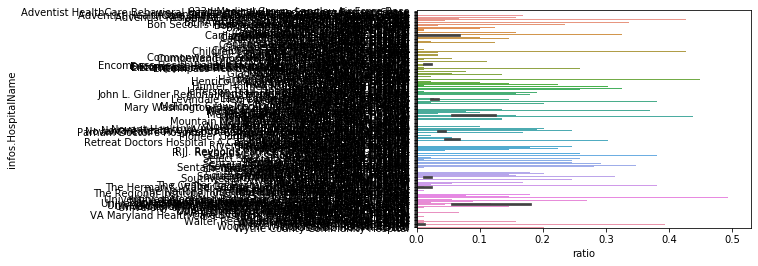

In [37]:
DMV_services_infos['ratio'] = DMV_services_infos.iloc[:,2:].sum(axis=1) / DMV_services_infos.shape[1]
sns.barplot(x='ratio',y='infos.HospitalName',data=DMV_services_infos)

In [38]:
Hospital_Data_In_US_new_payor_patientvolume_revenue.to_csv('cleaned_hospital_cleaned.csv',index=False)

In [39]:
Hospital_Data_In_US_new_payor_patientvolume_revenue

,estimatedPatientVolume,acute,hospitalRevenue,VerifiedTraumaProgram,url,infos.HospitalName,infos.Address,infos.City,infos.State,infos.Zipcode,infos.TypeOfFacility,infos.GeneralMed_SurgBeds,infos.SpecialCareBeds,infos.TotalEmployees,infos.TotalDischarges,infos.TotalPatientDays,infos.TotalPatientRevenue,infos.LatitudeLongitude,infos.MedicareCertifiedBeds,infos.OperatingStatus,infos.RuralDesignation,infos.Notes,infos.CMSid,clinicalServices.,clinicalServices.Other Services,clinicalServices.Emergency Services,clinicalServices.Special Care,clinicalServices.Subprovider Units,clinicalServices.Surgery,clinicalServices.Neurosciences,clinicalServices.Oncology Services,clinicalServices.Radiology / Nuclear Medicine / Imaging,clinicalServices.Rehabilitation Services,clinicalServices.Cardiovascular Services,clinicalServices.Organ Transplant (Medicare certified),clinicalServices.Orthopedic Services,clinicalServices.Wound Care,Routine Services_Beds,Routine Services_Revenue,Routine Services_Inpatient_Days_of_Medicare,Routine Services_Inpatient_Days_of_Medicaid,Routine Services_Inpatient_Days_of_Other,Routine Services_Total_Inpatient_Days,Intensive Care Unit_Beds,Intensive Care Unit_Revenue,Intensive Care Unit_Inpatient_Days_of_Medicare,Intensive Care Unit_Inpatient_Days_of_Medicaid,Intensive Care Unit_Inpatient_Days_of_Other,Intensive Care Unit_Total_Inpatient_Days,Total Acute_Beds,Total Acute_Revenue,Total Acute_Inpatient_Days_of_Medicare,Total Acute_Inpatient_Days_of_Medicaid,Total Acute_Inpatient_Days_of_Other,Total Acute_Total_Inpatient_Days,Swing Beds - SNF_Beds,Swing Beds - SNF_Revenue,Swing Beds - SNF_Inpatient_Days_of_Medicare,Swing Beds - SNF_Inpatient_Days_of_Medicaid,Swing Beds - SNF_Inpatient_Days_of_Other,Swing Beds - SNF_Total_Inpatient_Days,Total DPU_Beds,Total DPU_Revenue,Total DPU_Inpatient_Days_of_Medicare,Total DPU_Inpatient_Days_of_Medicaid,Total DPU_Inpatient_Days_of_Other,Total DPU_Total_Inpatient_Days,Total Hospital_Beds,Total Hospital_Revenue,Total Hospital_Inpatient_Days_of_Medicare,Total Hospital_Inpatient_Days_of_Medicaid,Total Hospital_Inpatient_Days_of_Other,Total Hospital_Total_Inpatient_Days,Nursery_Beds,Nursery_Revenue,Nursery_Inpatient_Days_of_Medicare,Nursery_Inpatient_Days_of_Medicaid,Nursery_Inpatient_Days_of_Other,Nursery_Total_Inpatient_Days,Psychiatric DPU_Beds,Psychiatric DPU_Revenue,Psychiatric DPU_Inpatient_Days_of_Medicare,Psychiatric DPU_Inpatient_Days_of_Medicaid,Psychiatric DPU_Inpatient_Days_of_Other,Psychiatric DPU_Total_Inpatient_Days,Labor and Delivery *_Beds,Labor and Delivery *_Revenue,Labor and Delivery *_Inpatient_Days_of_Medicare,Labor and Delivery *_Inpatient_Days_of_Medicaid,Labor and Delivery *_Inpatient_Days_of_Other,Labor and Delivery *_Total_Inpatient_Days,Rehabilitation DPU_Beds,Rehabilitation DPU_Revenue,Rehabilitation DPU_Inpatient_Days_of_Medicare,Rehabilitation DPU_Inpatient_Days_of_Medicaid,Rehabilitation DPU_Inpatient_Days_of_Other,Rehabilitation DPU_Total_Inpatient_Days,Skilled Nursing (SNF) Unit_Beds,Skilled Nursing (SNF) Unit_Revenue,Skilled Nursing (SNF) Unit_Inpatient_Days_of_Medicare,Skilled Nursing (SNF) Unit_Inpatient_Days_of_Medicaid,Skilled Nursing (SNF) Unit_Inpatient_Days_of_Other,Skilled Nursing (SNF) Unit_Total_Inpatient_Days,Neonatal Intensive Care_Beds,Neonatal Intensive Care_Revenue,Neonatal Intensive Care_Inpatient_Days_of_Medicare,Neonatal Intensive Care_Inpatient_Days_of_Medicaid,Neonatal Intensive Care_Inpatient_Days_of_Other,Neonatal Intensive Care_Total_Inpatient_Days,Surgical Intensive Care_Beds,Surgical Intensive Care_Revenue,Surgical Intensive Care_Inpatient_Days_of_Medicare,Surgical Intensive Care_Inpatient_Days_of_Medicaid,Surgical Intensive Care_Inpatient_Days_of_Other,Surgical Intensive Care_Total_Inpatient_Days,Swing Beds - NF_Beds,Swing Beds - NF_Revenue,Swing Beds - NF_Inpatient_Days_of_Medicare,Swing Beds - NF_Inpatient_Days_of_Medicaid,Swing Beds - NF_Inpatient_Days_of_Other,Swing Beds - NF_Total_Inpatient_Days,Coronary Intensive Care_Beds,Cor